**Import the important libraries that will be used frequently**


   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**downloading and reading the dataset**

In [ ]:
#downloading and reading the data
df = pd.read_csv('/content/AmesHousing.csv')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


**getting info about the null values in the dataset if there is a large number of null values in each column and drop that columns**

In [ ]:
#info about total null values
print((df.isnull().sum()>400).to_string())

Order              False
PID                False
MS SubClass        False
MS Zoning          False
Lot Frontage        True
Lot Area           False
Street             False
Alley               True
Lot Shape          False
Land Contour       False
Utilities          False
Lot Config         False
Land Slope         False
Neighborhood       False
Condition 1        False
Condition 2        False
Bldg Type          False
House Style        False
Overall Qual       False
Overall Cond       False
Year Built         False
Year Remod/Add     False
Roof Style         False
Roof Matl          False
Exterior 1st       False
Exterior 2nd       False
Mas Vnr Type        True
Mas Vnr Area       False
Exter Qual         False
Exter Cond         False
Foundation         False
Bsmt Qual          False
Bsmt Cond          False
Bsmt Exposure      False
BsmtFin Type 1     False
BsmtFin SF 1       False
BsmtFin Type 2     False
BsmtFin SF 2       False
Bsmt Unf SF        False
Total Bsmt SF      False


**removing columns that contain null values more than 400**

In [ ]:
#removing columns that contain null values more than 400
for i in df.columns:
  if df[i].isnull().sum() > 400 :
    df.drop(i , axis = 1 , inplace = True)
df

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


**columns that contain less number of null values i set the mean value of that column**

In [ ]:
#info about columns that contain less nan values
print(df.isnull().sum().to_string())

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fi

**getting information line min and max and count for each column**

In [ ]:
df.describe()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


**Visualize the data using scatter and histogram plot**

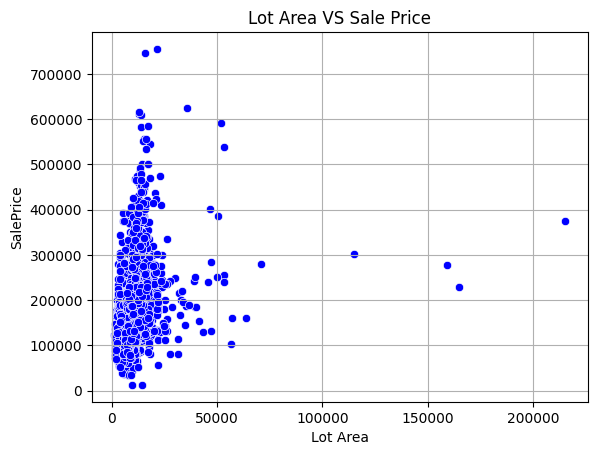

In [ ]:
sns.scatterplot(x = 'Lot Area' , y = 'SalePrice' ,data = df ,c = 'b')
plt.grid(True)
plt.title('Lot Area VS Sale Price')
plt.show()

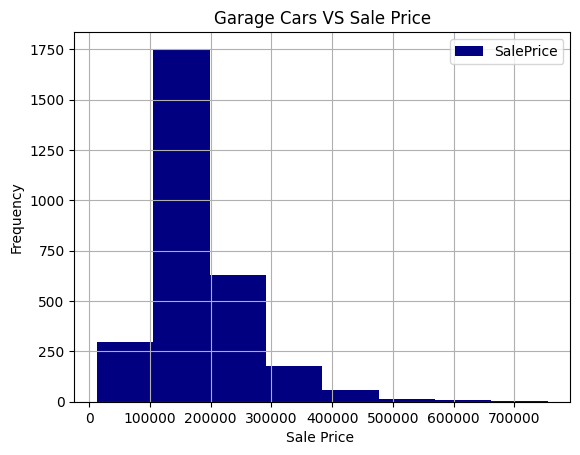

In [ ]:
df.plot(kind = 'hist' , x = 'Lot Area' , y = 'SalePrice' , grid = True , cmap = 'jet' , bins = 8)
plt.title('Garage Cars VS Sale Price')
plt.xlabel('Sale Price ')
plt.show()

transform the string values to numerical values using label encoder and i use the foor loop to know the type of each column and transform it

**transform string values to numerical using LabelEncoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label[col] = le
df

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,5,31770,1,0,3,0,0,...,0,0,0,0,0,5,2010,9,4,215000
1,2,526350040,20,4,11622,1,3,3,0,4,...,0,0,120,0,0,6,2010,9,4,105000
2,3,526351010,20,5,14267,1,0,3,0,0,...,0,0,0,0,12500,6,2010,9,4,172000
3,4,526353030,20,5,11160,1,3,3,0,0,...,0,0,0,0,0,4,2010,9,4,244000
4,5,527105010,60,5,13830,1,0,3,0,4,...,0,0,0,0,0,3,2010,9,4,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,5,7937,1,0,3,0,1,...,0,0,0,0,0,3,2006,9,4,142500
2926,2927,923276100,20,5,8885,1,0,2,0,4,...,0,0,0,0,0,6,2006,9,4,131000
2927,2928,923400125,85,5,10441,1,3,3,0,4,...,0,0,0,0,700,7,2006,9,4,132000
2928,2929,924100070,20,5,10010,1,3,3,0,4,...,0,0,0,0,0,4,2006,9,4,170000


**filling nan values with the mean of that column**

In [ ]:

for i in df.columns :
  if df[i].isnull().sum() > 0 :
    df[i] = df[i].fillna(df[i].mean())
print(df.isnull().sum().to_string())

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath    

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0 , 10))
df_scl = scaler.fit_transform(df)
df_scl'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler(feature_range = (0 , 10))\ndf_scl = scaler.fit_transform(df)\ndf_scl'

**creating new features from exsisting ones and visualizing them using scatter and line plot**

In [ ]:
#Feture ENG
df['House Age'] = df['Yr Sold'] - df['Year Built']
#df['Room to bed room ratio'] = df['TotRms AbvGrd'] // df['Bedroom AbvGr'].astype(int)
df['Garage Age'] = df['Yr Sold'] - df['Garage Yr Blt'].astype(int)
df

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,House Age,Garage Age
0,1,526301100,20,5,31770,1,0,3,0,0,...,0,0,0,5,2010,9,4,215000,50,50
1,2,526350040,20,4,11622,1,3,3,0,4,...,120,0,0,6,2010,9,4,105000,49,49
2,3,526351010,20,5,14267,1,0,3,0,0,...,0,0,12500,6,2010,9,4,172000,52,52
3,4,526353030,20,5,11160,1,3,3,0,0,...,0,0,0,4,2010,9,4,244000,42,42
4,5,527105010,60,5,13830,1,0,3,0,4,...,0,0,0,3,2010,9,4,189900,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,5,7937,1,0,3,0,1,...,0,0,0,3,2006,9,4,142500,22,22
2926,2927,923276100,20,5,8885,1,0,2,0,4,...,0,0,0,6,2006,9,4,131000,23,23
2927,2928,923400125,85,5,10441,1,3,3,0,4,...,0,0,700,7,2006,9,4,132000,14,28
2928,2929,924100070,20,5,10010,1,3,3,0,4,...,0,0,0,4,2006,9,4,170000,32,31


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


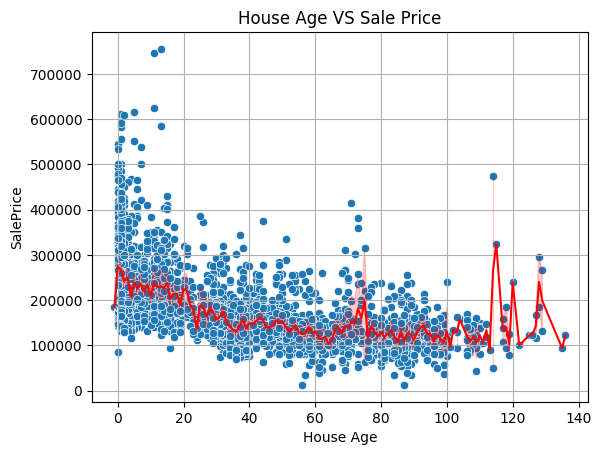

In [ ]:
sns.scatterplot( x = df['House Age'] , y = df['SalePrice'] , cmap = 'jet')
sns.lineplot(x = df['House Age'] , y = df['SalePrice'] , c= 'r')
plt.grid(True)
plt.title('House Age VS Sale Price')
plt.show()

**see the relatinship between Garage Age and Sale Price**

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


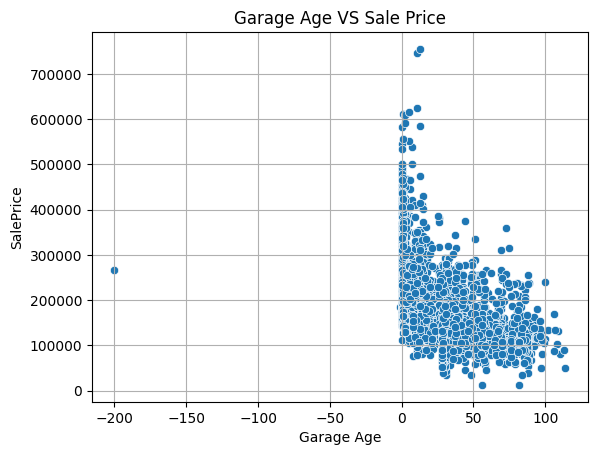

In [ ]:
sns.scatterplot( x = df['Garage Age'] , y = df['SalePrice'] , cmap = 'jet')
plt.grid(True)
plt.title('Garage Age VS Sale Price')
plt.show()

**getting correlation and relationships between features**

In [ ]:
cor_W_Ma = df.corr()
cor = cor_W_Ma['SalePrice'].sort_values(ascending = False).to_string()
print(cor)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647861
Garage Area        0.640385
Total Bsmt SF      0.632105
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.510684
Mas Vnr Area       0.505784
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432794
Foundation         0.406601
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Paved Drive        0.275964
Bsmt Full Bath     0.275894
2nd Flr SF         0.269373
Lot Area           0.266549
Central Air        0.264506
Roof Style         0.257170
Electrical         0.232197
Sale Condition     0.230125
Neighborhood       0.200238
Bsmt Unf SF        0.182805
House Style        0.167986
Bedroom AbvGr      0.143913
Exterior 1st       0.127041
Exterior 2nd       0.124436
Exter Cond         0.122877
Functional         0.113878
Screen Porch       0

**splitting the data into 80% for training , 20% for testing and checking the shape**

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['SalePrice' , 'Yr Sold' , 'Year Built' , 'Garage Yr Blt'] , axis = 1)
y = df[['SalePrice']]
X_train , X_test , y_train , y_test = train_test_split(x , y , train_size = 0.8 , random_state = 0 )
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (2344, 73)
X_test shape : (586, 73)
y_train shape : (2344, 1)
y_test shape : (586, 1)


**scalling the data using StandardScalr for better prediction**

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scl = StandardScaler().fit(X_train)
df_scl

StandardScaler()

**using the GridSearchCV to get the best value of each model parameters like alpha , C , n_neighbors and so on
fisrt model using the lasso regression to set a zero coef for all unimportant feature and larger weights for important ones and evaluate the model by using MAE , MSE , RMSE**

**First Using Lasso Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
LS = Lasso()
esm1 = {'alpha' : [3 , 2 , 1 , 0.1 , 0.01 , 0.001]}
gs1 = GridSearchCV(LS , esm1).fit(X_train ,y_train)
print(f'*********************************Best Alpha For Lasso Model is {gs1.best_params_}**********************************')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.520e+10, tolerance: 1.169e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.548e+10, tolerance: 1.189e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.511e+10, tolerance: 1.169e

*********************************Best Alpha For Lasso Model is {'alpha': 3}**********************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.519e+10, tolerance: 1.189e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
M1 = Lasso(alpha = 3).fit(X_train,y_train) # best alpha value is 3
y_hat1 = M1.predict(X_test)
print(f'Lasso Score = {M1.score(X_train , y_train)}')
print(f'Model coef = {M1.coef_[0]}')
print(f'Model intercept = {M1.intercept_[0]}')
print(f'MAE = {mean_absolute_error(y_test , y_hat1)}')
print(f'MSE = {mean_squared_error(y_test , y_hat1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test , y_hat1))}')

Lasso Score = 0.8756731272351344
Model coef = 1.5224499400445508
Model intercept = -74275.13927708447
MAE = 19870.356282016463
MSE = 1389147304.1154535
RMSE = 37271.26646782282


**visualize the lasso model applaying on test and the predicted data**

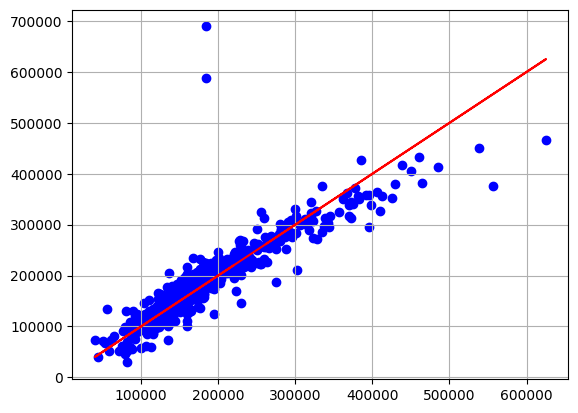

In [ ]:
plt.scatter(y_test , y_hat1 , c='b' )
plt.plot(y_test , y_test , c = 'r')
plt.grid(True)
plt.show()

**(2) Using Ridge Model**

In [ ]:
from sklearn.linear_model import Ridge
R = Ridge()
esm2 = {'alpha' : [0.01 , 0.1 , 1 , 3 , 5 , 7]}
gs2 = GridSearchCV(R , esm2).fit(X_train , y_train)
print(f'**********************************Best Alpha Value For Ridge Model is = {gs2.best_params_}*********************************')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.49828e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.49873e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.49907e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.49724e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

**********************************Best Alpha Value For Ridge Model is = {'alpha': 7}*********************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.04916e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.04785e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.0486e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.38852e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
M2 = Ridge(alpha = 7).fit(X_train,y_train) # best alpha value is 7
y_hat2 = M2.predict(X_test)
print(f'Ridge Score = {M2.score(X_train , y_train)}')
print(f'Model coef = {M2.coef_[0]}')
print(f'Model intercept = {M2.intercept_[0]}')
print(f'MAE = {mean_absolute_error(y_test , y_hat2)}')
print(f'MSE = {mean_squared_error(y_test , y_hat2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test , y_hat2))}')

Ridge Score = 0.8756225809240947
Model coef = 1.525771809600452
Model intercept = -74996.55247658351
MAE = 19877.676160705705
MSE = 1388440212.8630815
RMSE = 37261.77951820178


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.38852e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


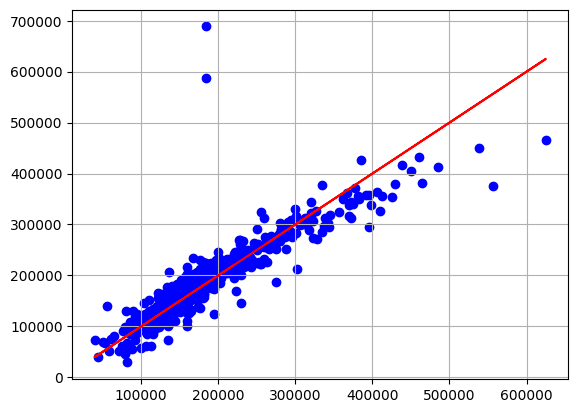

In [ ]:
plt.scatter(y_test , y_hat2 , c='b' )
plt.plot(y_test , y_test , c = 'r')
plt.grid(True)
plt.show()

**(3) Using Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
LG = LinearRegression()
esm3 = {'fit_intercept' : [True , False]}
gs3 = GridSearchCV(LG , esm3).fit(X_train , y_train)
print(f'Best Fit Intercept For Linear Regression Model is = {gs3.best_params_} ')

Best Fit Intercept For Linear Regression Model is = {'fit_intercept': False} 


In [ ]:
M3 = LinearRegression(fit_intercept = False).fit(X_train , y_train)
y_hat3 = M3.predict(X_test)
print(f'Linear Regrssion Score = {M3.score(X_test, y_test)}')
print(f'Model coef = {M3.coef_[0][0]}')
print(f'MAE = {mean_absolute_error(y_test , y_hat3)}')
print(f'MSE = {mean_squared_error(y_test , y_hat3)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test , y_hat3))}')

Linear Regrssion Score = 0.7882003437428151
Model coef = 1.4573762061839286
MAE = 19890.553224210405
MSE = 1390506272.5293305
RMSE = 37289.492789917786


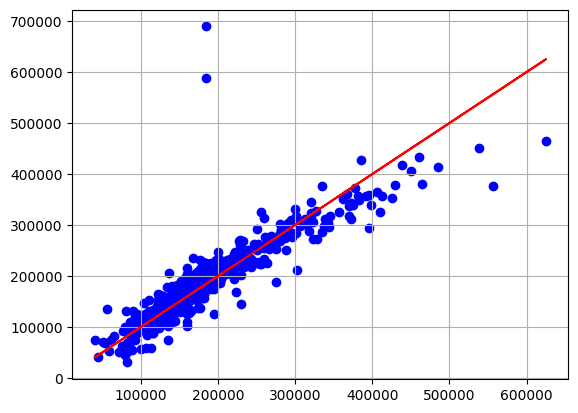

In [ ]:
plt.scatter(y_test , y_hat3 , c='b' )
plt.plot(y_test , y_test , c = 'r')
plt.grid(True)
plt.show()

In [ ]:
error = y_test - y_hat3
error

,SalePrice
2216,14481.936997
836,10991.271134
2396,-9788.279022
1962,9371.575508
305,4790.929992
...,...
2352,-34729.236791
2027,-70374.629580
867,6216.814321
2590,-68102.868643


**(4) Using Support Vector Machin Model**

In [ ]:
from sklearn.svm import SVR
SV = SVR()
esm4 = {'C' : [0.01 , 0.1 , 1 , 3 , 5 ,7]  , 'kernel' : ['linear' , 'rbf' , 'boly']}
gs4 = GridSearchCV(SV , esm4).fit(X_train , y_train)
print(f'*********************************Best C And Kernel Value For SVR Model is = {gs4.best_params_}***************************************')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
M4 = SVR(C = 3 , kernel = 'linear' ).fit(X_train , y_train) # best num of C is 3
y_hat4 = M4.predict(X_test)
M4.score(X_test , y_test)
print(f'SVM score = {M4.score(X_test, y_test)}')
print(f'Model coef = {M4.coef_[0][0]}')
print(f'Model intercept = {M4.intercept_[0]}')
print(f'MAE = {mean_absolute_error(y_test , y_hat4)}')
print(f'MSE = {mean_squared_error(y_test , y_hat4)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test , y_hat4))}')
#THE WORST MODEL UNTIL NOW

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# w = M4.coef_[0] * X_train + M4.intercept_
plt.scatter(y_test , y_hat4 , c='b' )
plt.plot(y_test , y_test , c = 'r')
plt.grid(True)
plt.show()

ValueError: Unable to coerce to Series, length must be 73: given 883

**(5) Using Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
esm5 = {'max_depth' : [1 ,3 , 5 , 7 , 9]}
gs5 = GridSearchCV(DT , esm5).fit(X_train , y_train)
print(f'Best Max Depth Value Fot Decision Tree Model is = {gs5.best_params_}')

Best Max Depth Value Fot Decision Tree Model is = {'max_depth': 7}


In [ ]:
M5 = DecisionTreeRegressor(max_depth = 7 , min_samples_leaf = 2).fit(X_train , y_train) # best max_depth is 7
y_hat5 = M5.predict(X_test)
print(f'Decision Tree Regressor score = {M5.score(X_test, y_test)}')
print(f'MAE = {mean_absolute_error(y_test , y_hat5)}')
print(f'MSE = {mean_squared_error(y_test , y_hat5)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test , y_hat5))}')

Decision Tree Regressor score = 0.7596096195907628
MAE = 25322.470130418766
MSE = 1578209982.5925326
RMSE = 39726.691060199475


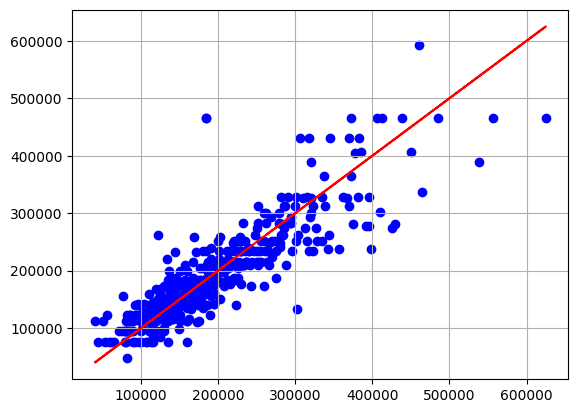

In [ ]:
plt.scatter(y_test , y_hat5 , c='b' )
plt.plot(y_test , y_test , c = 'r')
plt.grid(True)
plt.show()

**(6) Using Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
esm6 = {'max_depth' : [1 , 3 , 5 , 7 , 9]}
gs6 = GridSearchCV(RF , esm6).fit(X_train , y_train)
print(f'********************************************Best Max Depth Value For Random Forest Model is = {gs6.best_params_}*************************************************')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best Max Depth Value For Random Forest Model is = {'max_depth': 9}


In [ ]:
M6 = RandomForestRegressor(max_depth = 9).fit(X_train , y_train) # best max_depth is 9
y_hat6 = M6.predict(X_test)
print(f'Decision Tree Regressor score = {M5.score(X_test, y_test)}')
print(f'MAE = {mean_absolute_error(y_test , y_hat6)}')
print(f'MSE = {mean_squared_error(y_test , y_hat6)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test , y_hat6))}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Decision Tree Regressor score = 0.7596096195907628
MAE = 17342.87567447553
MSE = 904128871.1602114
RMSE = 30068.73577588874


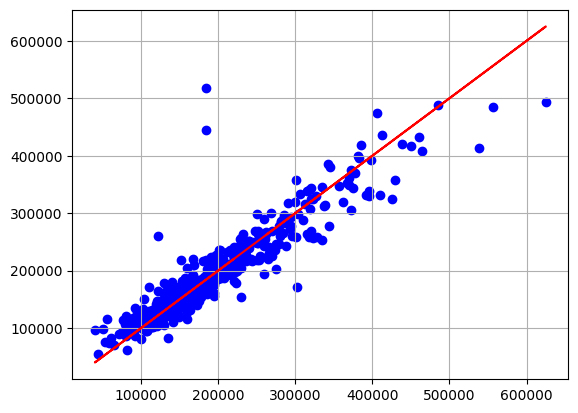

In [ ]:
plt.scatter(y_test , y_hat6 , c='b' )
plt.plot(y_test , y_test , c = 'r')
plt.grid(True)
plt.show()

**(7) Using K-NN Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
esm7 = {'n_neighbors' : [1 , 3 , 5 , 7 , 9]}
gs7 = GridSearchCV(KNN , esm7).fit(X_train , y_train)
print(f'Best Number Of Neighbors Of KNN Model is = {gs7.best_params_}')

Best Number Of Neighbors Of KNN Model is = {'n_neighbors': 3}


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
M7 = KNeighborsRegressor(n_neighbors = 3 , weights = 'distance').fit(X_train , y_train) # best n_neighbors is 3
y_hat7 = M7.predict(X_test)
print('K-NN score = {}'.format(M7.score(X_test , y_test)))
print(f'MAE = {mean_absolute_error(y_test , y_hat7)}')
print(f'MSE = {mean_squared_error(y_test , y_hat7)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test , y_hat7))}')

K-NN score = 0.7654711510462525
MAE = 26226.80738123597
MSE = 1539727879.271319
RMSE = 39239.36644839362


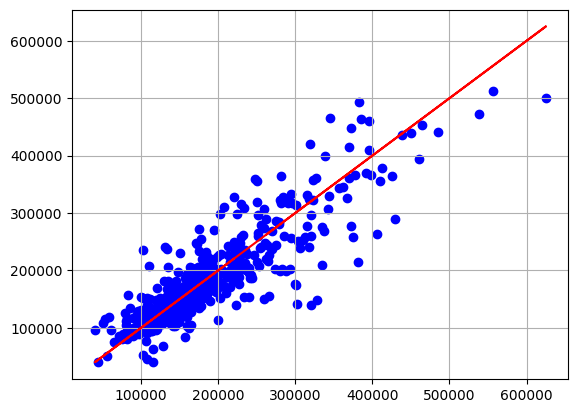

In [ ]:
plt.scatter(y_test ,y_hat7 , c='b' )
plt.plot(y_test , y_test , c = 'r')
plt.grid(True)
plt.show()

In [ ]:
# extra credit (1)
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
M8 = ElasticNet(alpha = 0.1 , l1_ratio = 1).fit(X_train , y_train)
y_hat8 = M8.predict(X_test)
print(f'Elastic Net score = {M8.score(X_test , y_test)}')
print(f'MSE = {mean_squared_error(y_test , y_hat8)}')


Elastic Net score = 0.7883317190766574
MSE = 1389643767.7028751


In [ ]:
# Extra credit (2)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
im_M = LinearRegression()
RF = RFE(im_M , n_features_to_select = 15).fit(X_train , y_train)
print(RF.ranking_)
print(RF.score(X_test , y_test))


[56 59 28 32 57  1 14 22  1 30  1 25 23  5  2 11  1  9 43  1  4 18 31 36
  1 19 10  3 12  8 51 50 27 54 44 42 17 20  1 41 38 39 48 33  1  1  1  7
 15  1  1  1 16  1 26 46  1 52 35  6 40 47 49 45 55 34 37 58 24 21 13 29
 53]
0.7698679128186704
